In [3]:
!pip install pandas numpy matplotlib seaborn scikit-learn

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [11]:
# Load the dataset
dataset_url = "https://drive.google.com/uc?export=download&id=1F3lRf32JM8ejnXq-Cbf9y7fa57zSHGz_"
df = pd.read_csv(dataset_url)

# Data Exploration
print("First 5 rows:")
display(df.head())


First 5 rows:


,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0


In [13]:
print("\nSummary of dataset:")
display(df.info())

print("\nUnique values in each column:")
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")

print("\nStatistical Summary:")
display(df.describe())



Summary of dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Company  140 non-null    object 
 1   Age      130 non-null    float64
 2   Salary   124 non-null    float64
 3   Place    134 non-null    object 
 4   Country  148 non-null    object 
 5   Gender   148 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 7.1+ KB


None


Unique values in each column:
Company: 6 unique values
Age: 29 unique values
Salary: 40 unique values
Place: 11 unique values
Country: 1 unique values
Gender: 2 unique values

Statistical Summary:


,Age,Salary,Gender
count,130.000000,124.000000,148.000000
mean,30.484615,5312.467742,0.222973
std,11.096640,2573.764683,0.417654
min,0.000000,1089.000000,0.000000
25%,22.000000,3030.000000,0.000000
50%,32.500000,5000.000000,0.000000
75%,37.750000,8000.000000,0.000000
max,54.000000,9876.000000,1.000000


In [15]:
# Rename columns for consistency
df.columns = [col.strip().lower().replace(" ", "_") for col in df.columns]


Checking missing values:


company    0
age        0
salary     0
place      0
country    0
gender     0
dtype: int64

C:\Users\Kamaru\AppData\Local\Temp\ipykernel_7516\1636265354.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].replace(0, np.nan, inplace=True)
C:\Users\Kamaru\AppData\Local\Temp\ipykernel_7516\1636265354.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example,

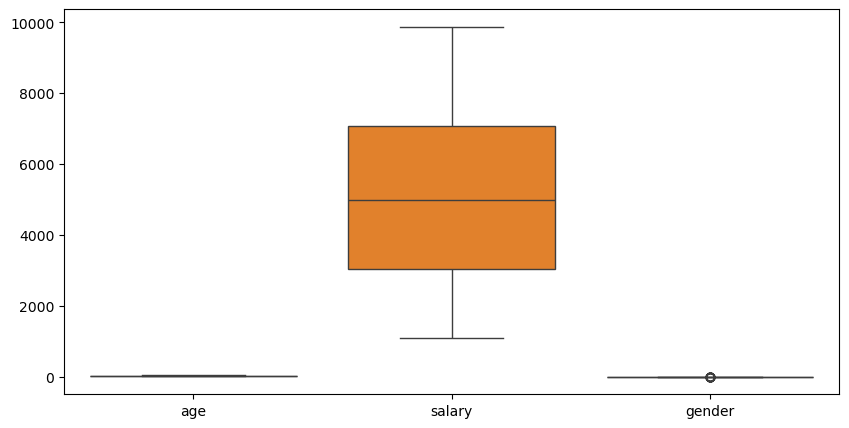

In [27]:
# Data Cleaning
print("\nChecking missing values:")
display(df.isnull().sum())

# Replace 0 in age column with NaN if age column exists
if 'age' in df.columns:
    df['age'].replace(0, np.nan, inplace=True)

# Handle missing values (replace with mean/median/mode as needed)
for col in df.columns:
    if df[col].dtype == 'object':
        df[col].fillna(df[col].mode()[0], inplace=True)
    else:
        df[col].fillna(df[col].median(), inplace=True)

# Remove duplicate rows
df.drop_duplicates(inplace=True)

# Outlier Detection using Boxplot
plt.figure(figsize=(10,5))
sns.boxplot(data=df.select_dtypes(include=[np.number]))
plt.show()

In [29]:
# Data Analysis
filtered_df = df[(df['age'] > 40) & (df['salary'] < 5000)]
print("\nFiltered Data (age > 40 and salary < 5000):")
display(filtered_df.head())



Filtered Data (age > 40 and salary < 5000):


,company,age,salary,place,country,gender
21,Infosys,50.0,3184.0,Delhi,India,0
32,Infosys,45.0,4034.0,Calcutta,India,0
39,Infosys,41.0,3000.0,Mumbai,India,0
50,Infosys,41.0,3000.0,Chennai,India,0
57,Infosys,51.0,3184.0,Hyderabad,India,0


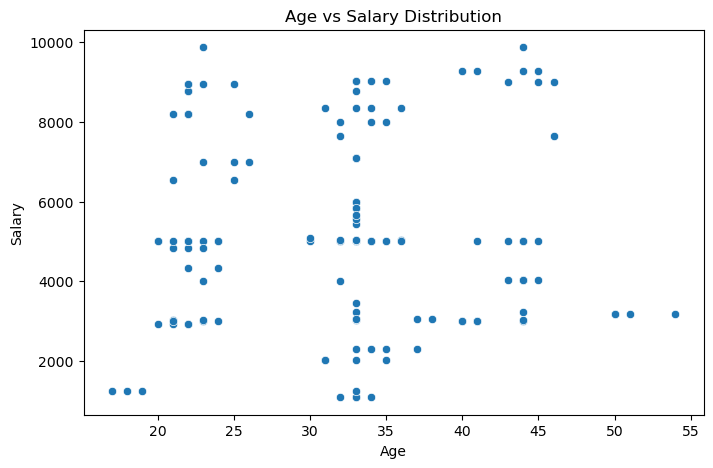

In [31]:
# Scatter plot: Age vs Salary
plt.figure(figsize=(8,5))
sns.scatterplot(x=df['age'], y=df['salary'])
plt.xlabel("Age")
plt.ylabel("Salary")
plt.title("Age vs Salary Distribution")
plt.show()

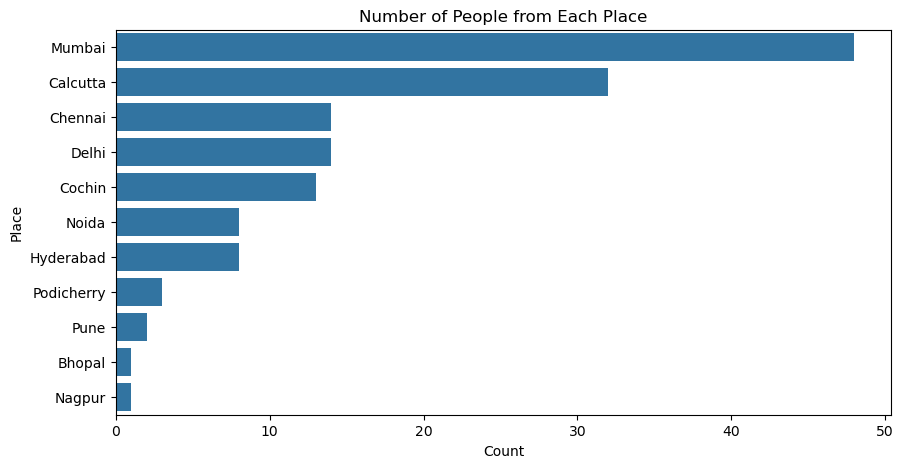

In [33]:
# Count plot of people from each place
if 'place' in df.columns:
    plt.figure(figsize=(10,5))
    sns.countplot(y=df['place'], order=df['place'].value_counts().index)
    plt.xlabel("Count")
    plt.ylabel("Place")
    plt.title("Number of People from Each Place")
    plt.show()

In [37]:
# Feature Scaling
scaler_standard = StandardScaler()
scaler_minmax = MinMaxScaler()

num_cols = df.select_dtypes(include=[np.number]).columns
df[num_cols] = scaler_standard.fit_transform(df[num_cols])
df[num_cols] = scaler_minmax.fit_transform(df[num_cols])

print("\nFinal Processed Data Sample:")
display(df.head())


Final Processed Data Sample:


,age,salary,place,country,gender,company_Congnizant,company_Infosys,company_Infosys Pvt Lmt,company_TCS,company_Tata Consultancy Services
0,0.081081,0.445089,Chennai,India,0.0,False,False,False,True,False
1,0.351351,0.445089,Mumbai,India,0.0,False,True,False,False,False
2,0.486486,0.137817,Calcutta,India,0.0,False,False,False,True,False
3,0.621622,0.217480,Delhi,India,0.0,False,True,False,False,False
4,0.162162,0.331285,Mumbai,India,0.0,False,False,False,True,False
